# Image Downsampling

In [7]:
!pip install matplotlib
!pip install networkx
!pip install ipympl
!pip install pillow
!pip install requests

In [18]:
from PIL                \
    import Image

from matplotlib         \
    import pyplot       \
    as Plot

from networkx           \
    import Graph

from requests           \
    import get          \
    as HTTPGet

from IPython.display    \
    import display      \
    as Display

from io                 \
    import BytesIO

%matplotlib ipympl

In [11]:
url_to_image: str = 'https://upload.wikimedia.org/wikipedia/commons/3/30/Stepper_Motor%2C_Model_17HS4401N%2C_4.jpg'
headers: dict = {
    'User-Agent': 'jupyter, experiementing(kent.vejrup.madsen@outlook.com)'
}

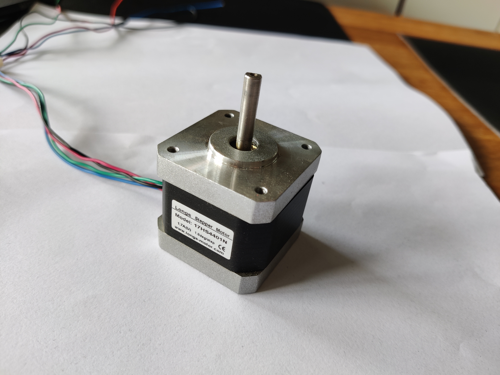

(500, 375)

(4000, 3000)

In [113]:
response: HTTPGet = HTTPGet(
    url_to_image, 
    headers=headers
)

image: Image.Image = Image.open(
    BytesIO(
        response.content
    )
)

width, height = image.size

thumbnail: Image.Image = image.copy()
thumbnail = thumbnail.resize(
    (
        int(width/8), 
        int(height/8)
    )
)

# Shows an example
Display(thumbnail)
Display(thumbnail.size)
Display((width, height))

In [93]:
class Grid:
    def __init__(self) -> None:
        self.width: int | None = None
        self.height: int | None = None

        self.data: list = list()

    def __del__(self) -> None:
        del             \
            self.data,  \
            self.width, \
            self.height
    
    def size(self):
        return (
            self.width, 
            self.height
        )

    def build(
        self, 
        width: int, 
        height: int
    ) -> None:
        self.width = width
        self.height = height
        
        for x in range(width):
            line: list = list()
            self.data.append(line)

            for y in range(height):
                line.append((0, 0, 0))
    
    def display(self) -> None:
        with Image.new(
            'RGB', 
            self.size(), 
            color='white'
        ) as image:
            creation = image
            pixel = creation.load()

            for x in range(self.width):
                for y in range(self.height):
                    pixel_red, pixel_green, pixel_blue = self.access(x, y)

                    pixel[x, y] = (
                        pixel_red, 
                        pixel_green, 
                        pixel_blue
                    )

            Display(creation)
    
    def access(self, x, y):
        return self.data[x][y]
    
    def set(self, x, y, value):
        self.data[x][y] = value

In [102]:
class ResolutionGrid:
    def __init__(
        self, 
        width: int, 
        height: int
    ) -> None:
        self.resolution: tuple = (width, height)
        self.grid: Grid = Grid()

    def __del__(self) -> None:
        del self.resolution, self.grid

    def build(
        self, 
        image: Image.Image
    ) -> None:
        width, height = self.retrieve_image_size(image)
        resolution_width, resolution_height = self.resolution

        grid_width: int = int(
            width/resolution_width
        )

        grid_height: int = int(
            height/resolution_height
        )

        self.grid.build(
            width=grid_width, 
            height=grid_height
        )

        self.build_resolution(image)
    
    def build_resolution(
        self, 
        image: Image.Image
    ) -> None:
        grid_width, grid_height = self.grid.size()

        for x in range(grid_width):
            for y in range(grid_height):
                red, green, blue = self.compute_grid(x, y, image=image)
                self.grid.set(
                    x, 
                    y, 
                    (red, green, blue)
                )

    def compute_grid(
        self, 
        grid_x, 
        grid_y, 
        image: Image.Image
    ) -> tuple:
        grid_resolution_width, grid_resolution_height = self.resolution

        begins_at_x: int = grid_x * grid_resolution_width
        begins_at_y: int = grid_y * grid_resolution_height

        ends_at_x: int = begins_at_x + grid_resolution_width
        ends_at_y: int = begins_at_y + grid_resolution_height        

        return self.compute_grid_in_image(
            begins_at_x, 
            ends_at_x, 
            begins_at_y, 
            ends_at_y, image
        )

    def compute_grid_in_image(
        self, 
        begins_at_x: int, 
        ends_at_x: int, 
        begins_at_y: int, 
        ends_at_y: int, 
        image: Image.Image
    ) -> tuple:
        access_at = image.load()
        resolution_width, resolution_height = self.resolution
        compact_by: int = resolution_height * resolution_width

        result: tuple = (0, 0, 0)

        for x in range(begins_at_x, ends_at_x):
            for y in range(begins_at_y, ends_at_y):
                red, green, blue = access_at[x, y]
                result_red, result_green, result_blue = result

                result_red = result_red + red
                result_green = result_green + green
                result_blue = result_blue + blue

                result = (result_red, result_green, result_blue)
        
        red, green, blue = result
        red = int(red/compact_by)
        green = int(green/compact_by)
        blue=int(blue/compact_by)

        return (red, green, blue)

    def retrieve_row_in_image(
        self,
        image: Image.Image, 
        y: int
    ) -> list:
        result: list = list()
        pixels = image.load()

        width: int = self.retrieve_image_width(image)
        
        for x in range(width):
            found: tuple = pixels[x, y]
            result.append(found)
        return result

    def retrieve_column_in_image(
        self,
        image: Image.Image, 
        x: int
    ) -> list:
        result: list = list()
        pixels = image.load()
        height: int = self.retrieve_image_height(image)

        for y in range(height):
            found: tuple = pixels[x, y]
            result.append(found)
        return result

    def retrieve_image_size(
        self, 
        image: Image.Image
    ) -> tuple:
        return image.size
    
    def retrieve_image_width(
        self, 
        image: Image.Image
    ) -> int:
        return image.size[0]

    def retrieve_image_height(
        self, 
        image: Image.Image
    ) -> int:
        return image.size[1]



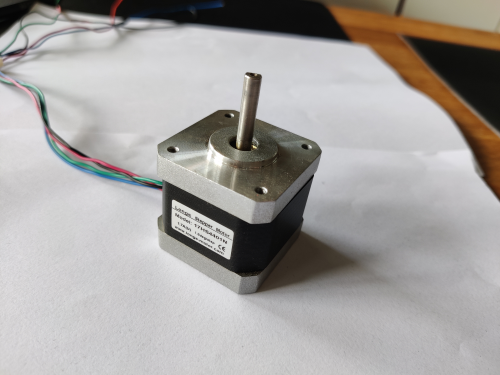

500
375


In [112]:
grid: ResolutionGrid = ResolutionGrid(
    width=8, 
    height=8
)

grid.build(
    image=image
)

grid.grid.display()